# Image Classification with CNN - Tutorial

> Image classification is the primary domain, in which deep neural networks play the most important role of medical image analysis. The image classification accepts the given input images and produces output classification.In image classification, CNNs are the recent state-of-the-art methods. The CNNs learned about natural images, showing strong performance and encountering the accuracy of human expert systems.


> The Convolution layer is always the first. Тhe image (matrix with pixel values) is entered into it. Imagine that the reading of the input matrix begins at the top left of image. Next the software selects a smaller matrix there, which is called a filter. Then the filter produces convolution, i.e. moves along the input image. The filter’s task is to multiply its values by the original pixel values. All these multiplications are summed up. One number is obtained in the end. 

> The nonlinear layer is added after each convolution operation. It has an activation function, which brings nonlinear property.

> The pooling layer follows the nonlinear layer. It works with width and height of the image and performs a downsampling operation on them. As a result the image volume is reduced.

> After completion of series of convolutional, nonlinear and pooling layers, it is necessary to attach a fully connected layer. This layer takes the output information from convolutional networks.

# *Please upvote the kernel if you find it insightful*

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Importing the dataset

In [12]:
import os
import splitfolders

ERROR! Session/line number was not unique in database. History logging moved to new session 2275


In [13]:
train_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split\train')
test_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split\val')

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (224, 224),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(224, 224),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [15]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 2086 images belonging to 5 classes.
Found 899 images belonging to 5 classes.


In [16]:
import numpy as np

In [17]:
X_train=[]
for j in range(len(train_generator)):    
    for m in train_generator[j][0]: 
        X_train.append(m)

In [18]:
y_train=[]
for i in range(len(train_generator)):
    for k in train_generator[i][1]:  
            y_train.append(np.argmax(k))           

In [19]:
X_test=[]        
for j in range(len(test_generator)):    
    for m in test_generator[j][0]: 
        X_test.append(m)

In [20]:
y_test=[]
for i in range(len(test_generator)):
    for k in test_generator[i][1]:  
            y_test.append(np.argmax(k))
           

In [21]:
x_train=np.array(X_train)
y_train=np.array(y_train)

x_test=np.array(X_test)
y_test=np.array(y_test)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (2086, 224, 224, 3) y_train shape: (2086,)


In [22]:
['Acne','Cyst, tumour and skin-tags','Melanoma','Moneypox','Normal skin']

['Acne', 'Cyst', 'tumour and skin-tags', 'Melanoma', 'Moneypox', 'Normal skin']

In [25]:
y = np.concatenate((y_train, y_test))

In [26]:
y

array([2, 3, 2, ..., 3, 3, 4], dtype=int64)

In [28]:
import numpy as np
abc_array = np.array(['B', 'D', 'A', 'F', 'H', 'I', 'Z', 'J'])

transdict = {0: 'Acne',
             1: 'Cyst, tumour and skin-tags',
             2: 'Melanoma',
             3: 'Monkeypox',
             4: 'Normal skin'
}

phoenetic = [transdict[letter] for letter in y]
print(' '.join(phoenetic))

Melanoma Monkeypox Melanoma Normal skin Normal skin Melanoma Cyst, tumour and skin-tags Normal skin Melanoma Normal skin Cyst, tumour and skin-tags Cyst, tumour and skin-tags Cyst, tumour and skin-tags Cyst, tumour and skin-tags Monkeypox Acne Normal skin Normal skin Acne Acne Monkeypox Acne Monkeypox Normal skin Acne Normal skin Melanoma Acne Normal skin Monkeypox Monkeypox Normal skin Melanoma Cyst, tumour and skin-tags Monkeypox Monkeypox Melanoma Melanoma Cyst, tumour and skin-tags Monkeypox Normal skin Melanoma Acne Melanoma Normal skin Acne Acne Monkeypox Normal skin Cyst, tumour and skin-tags Acne Acne Normal skin Monkeypox Cyst, tumour and skin-tags Monkeypox Monkeypox Monkeypox Monkeypox Melanoma Monkeypox Cyst, tumour and skin-tags Acne Normal skin Melanoma Melanoma Acne Monkeypox Melanoma Melanoma Acne Monkeypox Monkeypox Normal skin Monkeypox Melanoma Normal skin Melanoma Cyst, tumour and skin-tags Melanoma Acne Cyst, tumour and skin-tags Normal skin Cyst, tumour and skin-t

In [37]:
import numpy as np
abc_array = np.array(['B', 'D', 'A', 'F', 'H', 'I', 'Z', 'J'])

transdict = {0: 'Others',
             1: 'Others',
             2: 'Others',
             3: 'Monkeypox',
             4: 'Others'
}

phoenetic = [transdict[letter] for letter in y]
print(' '.join(phoenetic))

Others Monkeypox Others Others Others Others Others Others Others Others Others Others Others Others Monkeypox Others Others Others Others Others Monkeypox Others Monkeypox Others Others Others Others Others Others Monkeypox Monkeypox Others Others Others Monkeypox Monkeypox Others Others Others Monkeypox Others Others Others Others Others Others Others Monkeypox Others Others Others Others Others Monkeypox Others Monkeypox Monkeypox Monkeypox Monkeypox Others Monkeypox Others Others Others Others Others Others Monkeypox Others Others Others Monkeypox Monkeypox Others Monkeypox Others Others Others Others Others Others Others Others Others Monkeypox Others Others Others Others Others Others Others Others Others Others Monkeypox Others Others Others Others Monkeypox Monkeypox Others Others Others Others Others Others Others Others Others Others Others Others Others Monkeypox Monkeypox Others Monkeypox Others Monkeypox Others Others Others Others Others Others Others Others Others Others

C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

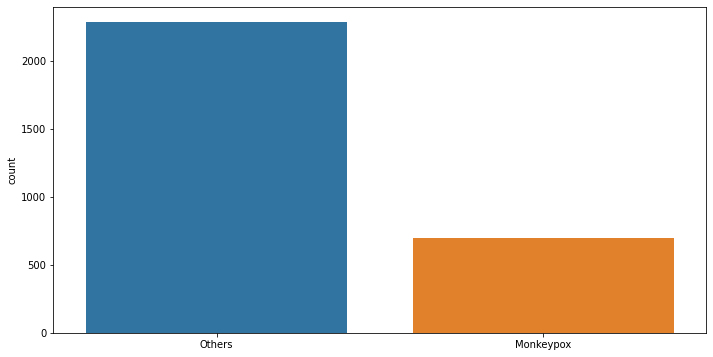

In [38]:
import seaborn as sns

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,6

sns.countplot(phoenetic, x="class")

In [23]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# x_train = x_train.reshape(x_train.shape[0], 28, 28)
# x_test = x_test.reshape(x_test.shape[0], 28, 28)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ['Acne',  # index 0
                        'Cyst, tumour and skin-tags',      # index 1
                        'Melanoma',        # index 3 
                        'Moneypox',         # index 4
                        'Normal skin',       # index 5
                       ]   # index 9

x_train shape: (2086, 224, 224, 3) y_train shape: (2086,)
2086 train set
899 test set
ERROR! Session/line number was not unique in database. History logging moved to new session 2276


# Class Distribution for Trainset

In [ ]:
# Create a dictionary for each type of label 
labels = {0 : 'Acne', 1: 'Cyst, tumour and skin-tags', 2: 'Melanoma', 3: 'Moneypox', 4: 'Normal skin'}

def get_classes_distribution(data):
    # Get the count for each label
#     label_counts = data["label"].value_counts()

    # Get total number of samples
#     total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(x_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-63d9445a11a7>", line 19, in <module>
    get_classes_distribution(x_train)
  File "<ipython-input-24-63d9445a11a7>", line 6, in get_classes_distribution
    label_counts = data["label"].value_counts()
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'IndexError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most rec

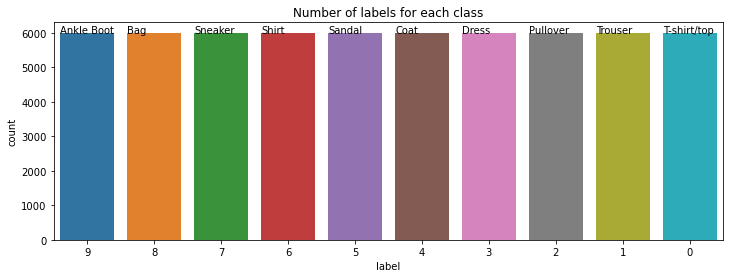

In [6]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    
plot_label_per_class(data_train)

# Class Distribution for Testset

In [7]:
get_classes_distribution(data_test)

Sneaker             :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Dress               :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Bag                 :   1000 or 10.0%
T-shirt/top         :   1000 or 10.0%


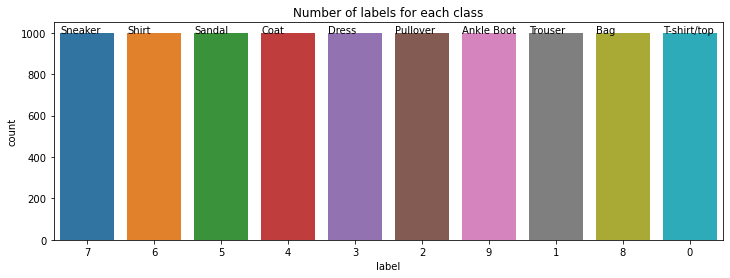

In [8]:
plot_label_per_class(data_test)

# Data Preprocessing

In [9]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
# Further break training data into train / validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data
x_train = x_train.reshape(x_train.shape[0], 28,28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28,28, 1)
x_test = x_test.reshape(x_test.shape[0], 28,28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


# Class imbalance for Trainset

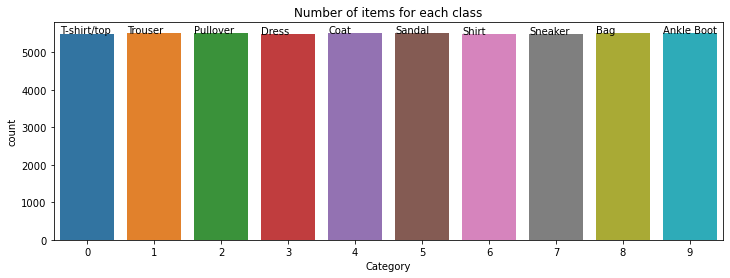

Bag                 :   5519 or 10.034545454545455%
Sandal              :   5511 or 10.02%
Ankle Boot          :   5506 or 10.010909090909092%
Pullover            :   5506 or 10.010909090909092%
Trouser             :   5500 or 10.0%
Coat                :   5499 or 9.998181818181818%
T-shirt/top         :   5498 or 9.996363636363636%
Shirt               :   5492 or 9.985454545454546%
Dress               :   5486 or 9.974545454545455%
Sneaker             :   5483 or 9.969090909090909%


In [11]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(ydf[0], order = np.arange(0,10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")
    
    for p, label in zip(g.patches, np.arange(0,10)):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
        
    plt.show()  

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))
    
plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

# Class imbalance for Validationset

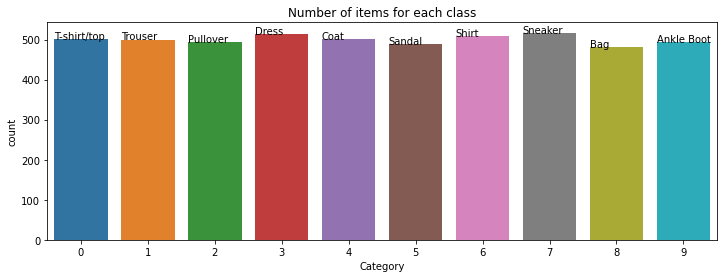

Sneaker             :   517 or 10.34%
Dress               :   514 or 10.280000000000001%
Shirt               :   508 or 10.16%
T-shirt/top         :   502 or 10.040000000000001%
Coat                :   501 or 10.02%
Trouser             :   500 or 10.0%
Pullover            :   494 or 9.879999999999999%
Ankle Boot          :   494 or 9.879999999999999%
Sandal              :   489 or 9.78%
Bag                 :   481 or 9.62%


In [12]:
plot_count_per_class(np.argmax(y_valid,axis=1))
get_count_per_class(np.argmax(y_valid,axis=1))

# Model definition and Training

In [13]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train, batch_size=100, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
550/550 [==============================] - 3s 5ms/step - loss: 0.5626 - accuracy: 0.7939 - val_loss: 0.3624 - val_accuracy: 0.8660
Epoch 2/30
550/550 [==============================] - 3s 5ms/step - loss: 0.3797 - accuracy: 0.8632 - val_loss: 0.2944 - val_accuracy: 0.8910
Epoch 3/30
550/550 [==============================] - 3s 5ms/step - loss: 0.3378 - accuracy: 0.8773 - val_loss: 0.2682 - val_accuracy: 0.8992
Epoch 4/30
550/550 [==============================] - 3s 5ms/step - loss: 0.3114 - accuracy: 0.8859 - val_loss: 0.2552 - val_accuracy: 0.9074
Epoch 5/30
550/550 [==============================] - 3s 5ms/step - loss: 0.2919 - accuracy: 0.8938 - val_loss: 0.2455 - val_accuracy: 0.9060
Epoch 6/30
550/550 [==============================] - 3s 5ms/step - loss: 0.2718 - accuracy: 0.9004 - val_loss: 0.2356 - val_accuracy: 0.9122
Epoch 7/30
550/550 [==============================] - 3s 5ms/step - loss: 0.2610 - accuracy: 0.9031 - val_loss: 0.2238 - val_accuracy: 0.9218
Epoch 

# Evaluation

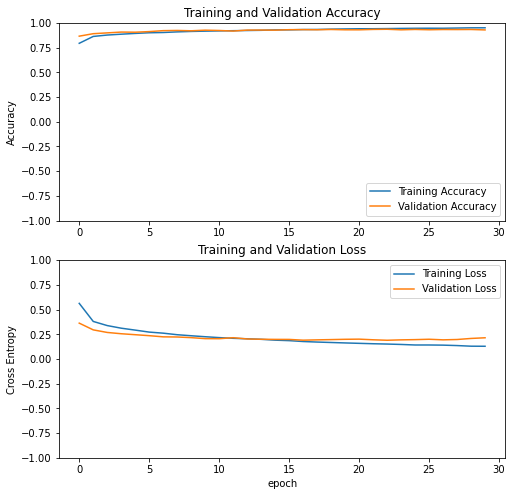

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [17]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9315000176429749


# Prediction

In [18]:
y_hat = model.predict(x_test)
predicted_classes = model.predict_classes(x_test)
y_true = data_test.iloc[:, 0]

# Classification Report

In [19]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.84      0.93      0.88      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.86      0.93      0.89      1000
      Class 3 (Dress) :       0.94      0.94      0.94      1000
       Class 4 (Coat) :       0.92      0.88      0.90      1000
     Class 5 (Sandal) :       0.99      0.98      0.98      1000
      Class 6 (Shirt) :       0.87      0.73      0.79      1000
    Class 7 (Sneaker) :       0.96      0.98      0.97      1000
        Class 8 (Bag) :       0.98      0.99      0.98      1000
 Class 9 (Ankle Boot) :       0.98      0.97      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.93      0.93      0.93     10000
           weighted avg       0.93      0.93      0.93     10000



# Predicted labels Visualization

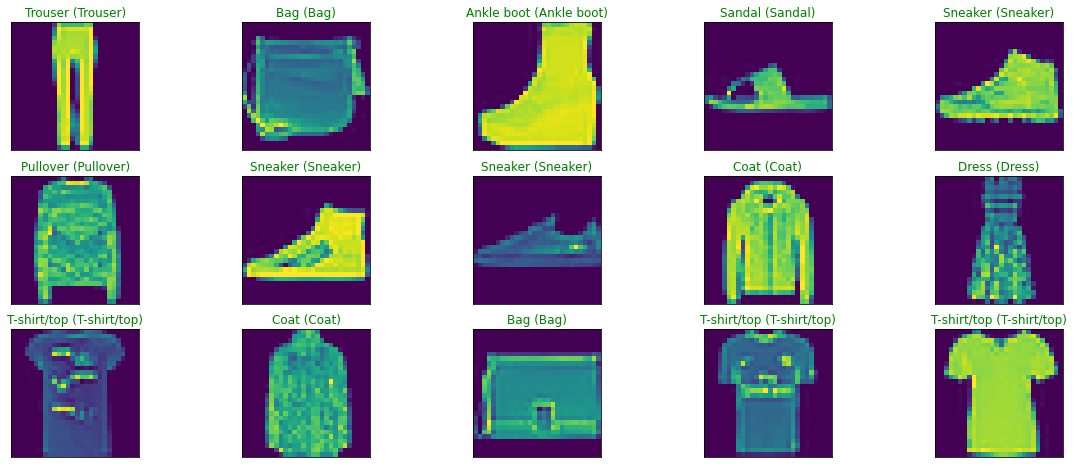

In [20]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))